<a href="https://colab.research.google.com/github/ErikVegaC/OTO-O2024/blob/main/A05_ProgramacionLineal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación matemática - A05_Programación_Lineal

### Erik Gabriel Vega Cervantes a 09 de septiembre de 2024


Usa los 5 pasos vistos en clase para plantear adecuadamente el siguiente ejercicio. Después, utiliza linprog para resolverlo.

Ejercicio 1.

Una carpintería local fabrica sillas, mesas, libreros y bases de cama. Hay dos empleados en esta carpintería: un empleado experimentado y un aprendiz. El aprendiz tarda aproximadamente 50% más tiempo que el carpintero experimentado en construir cualquier cosa, además de que tiene un desperdicio de alrededor de 20% de material. Los materiales y tiempos necesarios para construir algo se desglozan en la siguiente tabla:

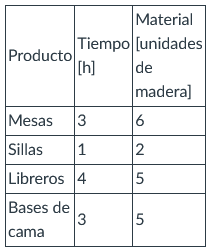

Las mesas se venden en  9000  , las sillas en  3000  , los libreros en    10000  , y las bases de cama en  9000  . Suponiendo una jornada de 40 horas a la semana y que tienen 100 unidades de madera, ¿qué les conviene construir durante una semana para maximizar su ganancia?

- ¿Cuántas horas trabaja cada quién?
- ¿Cuánto material se usa?
- ¿Cuál se el ingreso total si se vende todo lo  fabricado?

2. La carpintería recibió una orden por 3 combos de mesa + 6 sillas.

- ¿Se puede cumplir la orden?
- Si sí, ¿qué es lo que tienen que fabricar en el resto del tiempo y con el resto del material para maximizar su ganancia?
- ¿Cuántas horas trabaja cada quién?
- ¿Cuánto material se usa?
- ¿Cuál es el nuevo ingreso total?




1 . Identificar optimización (min/max)
 - Maximizar ganancia
 - Producto que conviene construir durante una semana

2. Variables de control
 - Empleado experimentado $ em_e $
    - $ em_em $
    - $ em_es $
    - $ em_el $
    - $ em_eb $
  - Empleado aprendiz $ em_a $
    - $ em_am $
    - $ em_as $
    - $ em_al $
    - $ em_ab $
3. Función de costo

$$ f(em_em, em_es, em_el, em_eb, em_am, em_as,em_al,em_ab) = 9000(em_em) + 9000(em_am) + 3000(em_es) + 3000(em_as) + 10000(em_el) + 10000(em_al) + 9000(em_eb) + 9000(em_ab)   $$

4. Información adicional

$$ 3em_eb + 4em_el + 1em_es + 3em_em  \leq 40  $$
$$ 3*1.5em_ab + 4*1.5em_al + 1*1.5em_as + 3*1.5*em_am \leq 40  $$  
$$   6em_em + 6*1.2*em_am + 2em_es + 2*1.2em_as + 5em_el + 5*1.2em_al + 5em_eb +  5*1.2em_ab  \leq 100  $$



In [ ]:
import scipy.optimize as opt

import numpy as np

c = np.array([
    -9000,
    -3000,
    -10000,
    -9000,
    -9000,
    -3000,
    -10000,
    -9000

])


A1_ub = np.array([
    [  3,  1,  4,  3,    0,    0,  0,    0],
    [  0,  0,  0,  0,  4.5,  1.5,  6,  4.5],
    [  6,  2,  5,  5,  7.2,  2.4,  6,    6]

])


B1_ub = np.array([
    40,
    40,
    100
])


solve1 = opt.linprog(c,A1_ub,B1_ub,integrality=1)

h_trab_e_a = A1_ub @ solve1.x

p_max_gan = (solve1.x[solve1.x.argmax()])

print(f"Producto que conviene fabricar para maximizar la ganancia son los libreros")
print(f"Las horas trabajadas del empleado experimentado son: {int(h_trab_e_a[0])} horas")
print(f"Las horas trabajadas del empleado aprendiz son: {int(h_trab_e_a[1])} horas")
print(f"Los tablones utilizados fueron {int(h_trab_e_a[2])}")
print(f"El ingreso total por lo fabricado es ${int(abs(solve1.fun))}")
p_max_gan


Producto que conviene fabricar para maximizar la ganancia son los libreros
Las horas trabajadas del empleado experimentado son: 40 horas
Las horas trabajadas del empleado aprendiz son: 39 horas
Los tablones utilizados fueron 100
El ingreso total por lo fabricado es $176000


9.000000000000002